In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

In [2]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
usa = world[world['ADMIN'] == 'United States of America']

In [4]:
all_reports = pd.read_csv('/Users/jimnguyen/IRMII/SCS_API/data/All_SCS_Reports.csv',low_memory = False)

In [5]:
all_reports['BEGIN'] = (
    all_reports['BEGIN_YEARMONTH'].astype(str)
    + all_reports['BEGIN_DAY'].astype(str).str.zfill(2)
    + all_reports['BEGIN_TIME'].astype(str).str.zfill(4)
).astype(int)

In [6]:
all_reports['END'] = (
    all_reports['END_YEARMONTH'].astype(str)
    + all_reports['END_DAY'].astype(str).str.zfill(2)   
    + all_reports['END_TIME'].astype(str).str.zfill(4) 
).astype(int)

In [7]:
reports = all_reports[['BEGIN','END','EVENT_TYPE','BEGIN_LAT','BEGIN_LON','END_LAT','END_LON','MAGNITUDE']]

In [8]:
hail_reports = reports[reports['EVENT_TYPE']== 'Hail']
hail_reports

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,NaN,NaN,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,NaN,NaN,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,NaN,NaN,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,NaN,NaN,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [10]:
fill_hail_reports = hail_reports
fill_hail_reports

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,NaN,NaN,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,NaN,NaN,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,NaN,NaN,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,NaN,NaN,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [11]:
fill_hail_reports['END_LAT'] = (
    fill_hail_reports['END_LAT']
      .fillna(fill_hail_reports['BEGIN_LAT'])
)
fill_hail_reports['END_LON'] = (
    fill_hail_reports['END_LON']
      .fillna(fill_hail_reports['BEGIN_LON'])
)
fill_hail_reports

/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/77819830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_hail_reports['END_LAT'] = (
/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/77819830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_hail_reports['END_LON'] = (


,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,38.70,-94.08,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,30.50,-87.90,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,33.28,-86.78,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,37.08,-107.80,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,37.08,-94.68,1.75
...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [13]:
filtered_hail_reports= fill_hail_reports.dropna()
filtered_hail_reports

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,38.70,-94.08,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,30.50,-87.90,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,33.28,-86.78,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,37.08,-107.80,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,37.08,-94.68,1.75
...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [39]:
filtered_hail_reports['LAT'] = filtered_hail_reports[['BEGIN_LAT','END_LAT']].mean(axis=1)
filtered_hail_reports['LON'] = filtered_hail_reports[['BEGIN_LON','END_LON']].mean(axis=1)

/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/344468623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hail_reports['LAT'] = filtered_hail_reports[['BEGIN_LAT','END_LAT']].mean(axis=1)
/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/344468623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hail_reports['LON'] = filtered_hail_reports[['BEGIN_LON','END_LON']].mean(axis=1)


## Comparision

In [15]:
hail_convective_path = '/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2024/12/forecast_day1'

In [ ]:
combined_hail_outlooks = []
for i in range()
    hail_gdf = gpd.read_file('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2024/1/forecast_day1/day1otlk_20240111_1200/day1otlk_20240111_1200_hail.shp')


In [ ]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
hail_convective_path = Path('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2024/12/forecast_day1')

shp_paths = list(hail_convective_path.glob('*1200/*.shp'))

gdfs = [gpd.read_file(p) for p in shp_paths]
all_hail = gpd.GeoDataFrame(
    pd.concat(gdfs, ignore_index=True),
    crs=gdfs[0].crs
)

print(f"Found {len(shp_paths)} shapefiles; combined GeoDataFrame has {len(all_hail)} records.")

In [23]:
all_hail.dropna()

,DN,geometry,VALID,EXPIRE,ISSUE,LABEL,LABEL2,stroke,fill
6,2,"POLYGON ((-98.42812 26.00982, -98.48 27.04, -9...",202412031200,202412041200,202412030531,TSTM,General Thunderstorms Risk,#55BB55,#C1E9C1
8,2,"MULTIPOLYGON (((-90.39 39.31, -87.58 39.41, -8...",202412151200,202412161200,202412150544,TSTM,General Thunderstorms Risk,#55BB55,#C1E9C1
9,3,"POLYGON ((-97.38 34.13, -96.2 35.23, -95.38 35...",202412151200,202412161200,202412150544,MRGL,Marginal Risk,#005500,#66A366
11,5,"POLYGON ((-97.38 34.13, -96.2 35.23, -95.38 35...",202412151200,202412161200,202412150544,0.05,5% Hail Risk,#70380f,#9d4e15
17,2,"MULTIPOLYGON (((-94.31 35.88, -93.22 34.71, -9...",202412231200,202412241200,202412230517,TSTM,General Thunderstorms Risk,#55BB55,#C1E9C1
...,...,...,...,...,...,...,...,...,...
220,3,"POLYGON ((-95.79 34.34, -94.54 34.72, -93.27 3...",202412171200,202412181200,202412170545,MRGL,Marginal Risk,#005500,#66A366
221,5,"POLYGON ((-95.44 34.24, -93.54 34.71, -91.39 3...",202412171200,202412181200,202412170545,0.05,5% Wind Risk,#70380f,#9d4e15
234,2,"POLYGON ((-124.23148 45.31599, -123.9 45.16, -...",202412211200,202412221200,202412210526,TSTM,General Thunderstorms Risk,#55BB55,#C1E9C1
242,2,"POLYGON ((-124.73773 42.6733, -124.08 42.18, -...",202412201200,202412211200,202412200510,TSTM,General Thunderstorms Risk,#55BB55,#C1E9C1


**This code below should be getting all of the shp files from all years but it is just taking forever**

In [119]:
from pathlib import Path
import geopandas as gpd

base = Path('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks')

shp_paths = list(
    base.glob('[0-9]*/*/forecast_day1/*1200/*.shp')
)

print(f"Found {len(shp_paths)} shapefiles in all years/months.")

gdfs = [gpd.read_file(p) for p in shp_paths]
all_hail = gpd.GeoDataFrame(
    pd.concat(gdfs, ignore_index=True),
    crs=gdfs[0].crs
)
print(f"Combined GeoDataFrame has {len(all_hail)} features.")

Found 21168 shapefiles in all years/months.


KeyboardInterrupt: 

# Read 2024

In [60]:
from pathlib import Path
import geopandas as gpd
import pandas as pd

base = Path('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2024')

shp_paths = list(
    base.glob('[0-9]/forecast_day1/*1200/*hail.shp')
)

print(f"Found {len(shp_paths)} shapefiles in all years/months.")

gdfs = [gpd.read_file(p) for p in shp_paths]
hail_outlook_24 = gpd.GeoDataFrame(
    pd.concat(gdfs, ignore_index=True),
    crs=gdfs[0].crs
)
print(f"Combined GeoDataFrame has {len(all_hail)} features.")

Found 548 shapefiles in all years/months.
Combined GeoDataFrame has 250 features.


In [61]:
hail_outlook_24 = hail_outlook_24.dropna()

In [62]:
for col in ['VALID','EXPIRE','ISSUE']:
    hail_outlook_24[col] = pd.to_datetime(
        hail_outlook_24[col].astype(str),
        format='%Y%m%d%H%M'
    )
hail_outlook_24

,DN,geometry,VALID,EXPIRE,ISSUE,LABEL,LABEL2,stroke,fill
1,5,"MULTIPOLYGON (((-99.21551 49.18204, -100.18 48...",2024-09-16 12:00:00,2024-09-17 12:00:00,2024-09-16 05:56:00,0.05,5% Hail Risk,#70380f,#9d4e15
2,15,"POLYGON ((-94.40081 48.98027, -96.95 47.76, -9...",2024-09-16 12:00:00,2024-09-17 12:00:00,2024-09-16 05:56:00,0.15,15% Hail Risk,#DDAA00,#FFE066
4,5,"MULTIPOLYGON (((-88.65 40.22, -87.53 41.55, -8...",2024-09-20 12:00:00,2024-09-21 12:00:00,2024-09-20 05:26:00,0.05,5% Hail Risk,#70380f,#9d4e15
5,5,"MULTIPOLYGON (((-105.22435 30.55321, -104.86 3...",2024-09-21 12:00:00,2024-09-22 12:00:00,2024-09-21 05:50:00,0.05,5% Hail Risk,#70380f,#9d4e15
6,15,"POLYGON ((-102.68 35.78, -101.61 35.49, -101.3...",2024-09-21 12:00:00,2024-09-22 12:00:00,2024-09-21 05:50:00,0.15,15% Hail Risk,#DDAA00,#FFE066
...,...,...,...,...,...,...,...,...,...
767,15,"MULTIPOLYGON (((-101.39 40.42, -100.54 40.87, ...",2024-05-03 12:00:00,2024-05-04 12:00:00,2024-05-03 05:55:00,0.15,15% Hail Risk,#DDAA00,#FFE066
768,10,"POLYGON ((-101.7 31.55, -101.88 32.68, -101.95...",2024-05-03 12:00:00,2024-05-04 12:00:00,2024-05-03 05:55:00,SIGN,10% Significant Hail Risk,#000000,#888888
769,10,"POLYGON ((-101.7 31.55, -101.88 32.68, -101.95...",2024-05-03 12:00:00,2024-05-04 12:00:00,2024-05-03 05:55:00,SIGN,10% Significant Hail Risk,#000000,#888888
771,5,"MULTIPOLYGON (((-103.09201 28.86228, -103.2 32...",2024-05-15 12:00:00,2024-05-16 12:00:00,2024-05-15 05:59:00,0.05,5% Hail Risk,#70380f,#9d4e15


In [41]:
filtered_hail_reports_24

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE,LAT,LON
1865,195509221610,195509221610,Hail,38.70,-94.08,38.70,-94.08,1.50,38.70,-94.08
1868,195507191330,195507191330,Hail,30.50,-87.90,30.50,-87.90,0.75,30.50,-87.90
1875,195510281645,195510281645,Hail,33.28,-86.78,33.28,-86.78,2.00,33.28,-86.78
1879,195506121700,195506121700,Hail,37.08,-107.80,37.08,-107.80,1.00,37.08,-107.80
1882,195505071845,195505071845,Hail,37.08,-94.68,37.08,-94.68,1.75,37.08,-94.68
...,...,...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75,40.58,-99.38
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75,40.32,-98.90
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00,40.55,-99.32
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00,40.71,-99.88


In [42]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

for col in ['BEGIN','END']:
    filtered_hail_reports[col] = pd.to_datetime(
        filtered_hail_reports[col].astype(str),
        format='%Y%m%d%H%M'
    )

mask = (
    (filtered_hail_reports['BEGIN'].dt.year == 2024) |
    (filtered_hail_reports['END'  ].dt.year == 2024)
)

filtered_hail_reports_24 = filtered_hail_reports.loc[mask].copy()


/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/2165109932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hail_reports[col] = pd.to_datetime(
/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/2165109932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hail_reports[col] = pd.to_datetime(


In [69]:
filtered_hail_reports_24

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE,LAT,LON
1132174,2024-05-23 19:47:00,2024-05-23 19:47:00,Hail,34.638,-99.2167,34.638,-99.2167,1.50,34.638,-99.2167
1132178,2024-05-14 15:10:00,2024-05-14 15:15:00,Hail,34.510,-88.2100,34.510,-88.2100,1.00,34.510,-88.2100
1132179,2024-05-14 13:52:00,2024-05-14 13:57:00,Hail,35.200,-88.2400,35.200,-88.2400,0.88,35.200,-88.2400
1132184,2024-06-15 19:24:00,2024-06-15 19:27:00,Hail,46.620,-101.9100,46.620,-101.9100,1.50,46.620,-101.9100
1132185,2024-06-02 14:30:00,2024-06-02 14:33:00,Hail,46.390,-99.4900,46.390,-99.4900,1.00,46.390,-99.4900
...,...,...,...,...,...,...,...,...,...,...
1168917,2024-07-06 12:46:00,2024-07-06 12:46:00,Hail,40.580,-99.3800,40.580,-99.3800,1.75,40.580,-99.3800
1168918,2024-07-06 15:20:00,2024-07-06 15:20:00,Hail,40.320,-98.9000,40.320,-98.9000,0.75,40.320,-98.9000
1168944,2024-07-06 12:55:00,2024-07-06 12:55:00,Hail,40.550,-99.3200,40.550,-99.3200,2.00,40.550,-99.3200
1168953,2024-07-06 12:58:00,2024-07-06 12:58:00,Hail,40.710,-99.8800,40.710,-99.8800,1.00,40.710,-99.8800


In [70]:
import geopandas as gpd

filtered_hail_reports_24_gdf = gpd.GeoDataFrame(
    filtered_hail_reports_24,
    geometry=gpd.points_from_xy(
        filtered_hail_reports_24['LON'],
        filtered_hail_reports_24['LAT']
    ),
    crs="EPSG:4326"
)


In [71]:
filtered_hail_reports_24_gdf

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE,LAT,LON,geometry
1132174,2024-05-23 19:47:00,2024-05-23 19:47:00,Hail,34.638,-99.2167,34.638,-99.2167,1.50,34.638,-99.2167,POINT (-99.2167 34.638)
1132178,2024-05-14 15:10:00,2024-05-14 15:15:00,Hail,34.510,-88.2100,34.510,-88.2100,1.00,34.510,-88.2100,POINT (-88.21 34.51)
1132179,2024-05-14 13:52:00,2024-05-14 13:57:00,Hail,35.200,-88.2400,35.200,-88.2400,0.88,35.200,-88.2400,POINT (-88.24 35.2)
1132184,2024-06-15 19:24:00,2024-06-15 19:27:00,Hail,46.620,-101.9100,46.620,-101.9100,1.50,46.620,-101.9100,POINT (-101.91 46.62)
1132185,2024-06-02 14:30:00,2024-06-02 14:33:00,Hail,46.390,-99.4900,46.390,-99.4900,1.00,46.390,-99.4900,POINT (-99.49 46.39)
...,...,...,...,...,...,...,...,...,...,...,...
1168917,2024-07-06 12:46:00,2024-07-06 12:46:00,Hail,40.580,-99.3800,40.580,-99.3800,1.75,40.580,-99.3800,POINT (-99.38 40.58)
1168918,2024-07-06 15:20:00,2024-07-06 15:20:00,Hail,40.320,-98.9000,40.320,-98.9000,0.75,40.320,-98.9000,POINT (-98.9 40.32)
1168944,2024-07-06 12:55:00,2024-07-06 12:55:00,Hail,40.550,-99.3200,40.550,-99.3200,2.00,40.550,-99.3200,POINT (-99.32 40.55)
1168953,2024-07-06 12:58:00,2024-07-06 12:58:00,Hail,40.710,-99.8800,40.710,-99.8800,1.00,40.710,-99.8800,POINT (-99.88 40.71)


In [115]:
import pandas as pd
import geopandas as gpd
from shapely.ops import unary_union
import numpy as np

for df, cols in [
    (hail_outlook_24,               ['VALID','EXPIRE']),
    (filtered_hail_reports_24_gdf,  ['BEGIN','END']),
]:
    for c in cols:
        df[c] = pd.to_datetime(df[c])

hail_outlook_24   = hail_outlook_24.set_crs("EPSG:4326", allow_override=True)
filtered_hail_reports_24_gdf = filtered_hail_reports_24_gdf.set_crs("EPSG:4326", allow_override=True)

#Group by the unique (VALID, EXPIRE) window
#Union the geometries of the outlooks that comes together
records = []
for (valid, expire), grp in hail_outlook_24.groupby(['VALID','EXPIRE']):
    # union of all risk-level polygons for this window
    union_poly = unary_union(grp.geometry.values)
    
    # temporal overlap: END ≥ valid  AND  BEGIN ≤ expire
    mask_time = (
        (filtered_hail_reports_24_gdf['END']   >= valid) &
        (filtered_hail_reports_24_gdf['BEGIN'] <= expire)
    )
    candidate_reports = filtered_hail_reports_24_gdf[mask_time]
    
    # spatial filter: points inside the *union* polygon
    hits = candidate_reports[candidate_reports.geometry.within(union_poly)]
    
    records.append({
        'VALID':    valid,
        'EXPIRE':   expire,
        'n_events': len(candidate_reports),
        'n_hits':   len(hits),
        'hit_rate': (len(hits) / len(candidate_reports)
                     if len(candidate_reports)>0 else np.nan),
        'geometry': union_poly
    })

outlook_verif_period = gpd.GeoDataFrame(records, crs="EPSG:4326")

total_events = outlook_verif_period['n_events'].sum()
total_hits   = outlook_verif_period['n_hits'].sum()
overall_hit  = total_hits / total_events

print(f"Unique forecast periods: {len(outlook_verif_period)}")
print(f"Total reports in valid windows: {total_events:,}")
print(f"Total hits: {total_hits:,} → overall hit rate = {overall_hit:.2%}")

# — gather unique hit‐indices across all windows —
hit_event_idxs = set()
for (valid, expire), grp in hail_outlook_24.groupby(['VALID','EXPIRE']):
    union_poly = unary_union(grp.geometry.values)
    mask_time = (
        (filtered_hail_reports_24_gdf['END']   >= valid) &
        (filtered_hail_reports_24_gdf['BEGIN'] <= expire)
    )
    candidate_reports = filtered_hail_reports_24_gdf[mask_time]
    hits = candidate_reports[candidate_reports.geometry.within(union_poly)]
    hit_event_idxs.update(hits.index)

# — compute totals & misses —
total_events = len(filtered_hail_reports_24_gdf)
unique_hits  = len(hit_event_idxs)
missed       = total_events - unique_hits
missed_pct   = missed / total_events * 100

print(f"Total hail events in 2024:          {total_events}")
print(f"Events hit by any forecast window:  {unique_hits}")
print(f"Events NOT in any window (missed):  {missed} → {missed_pct:.2f}%")


outlook_verif_period.sort_values('VALID')


Unique forecast periods: 205
Total reports in valid windows: 8,682
Total hits: 7,093 → overall hit rate = 81.70%
Total hail events in 2024:          8992
Events hit by any forecast window:  7090
Events NOT in any window (missed):  1902 → 21.15%


,VALID,EXPIRE,n_events,n_hits,hit_rate,geometry
0,2024-01-08 12:00:00,2024-01-09 12:00:00,28,20,0.714286,"POLYGON ((-88.406 29.863, -88.432 29.714, -88...."
1,2024-01-09 12:00:00,2024-01-10 12:00:00,2,1,0.500000,"MULTIPOLYGON (((-87.6 31.08, -86.82 32, -84.85..."
2,2024-01-11 12:00:00,2024-01-12 12:00:00,33,18,0.545455,"POLYGON ((-97.75 30.14, -97.94 31.18, -97.48 3..."
3,2024-01-12 12:00:00,2024-01-13 12:00:00,0,0,NaN,"POLYGON ((-80.98281 31.03361, -82.17 30.21, -8..."
4,2024-01-23 12:00:00,2024-01-24 12:00:00,4,4,1.000000,"POLYGON ((-99.3 26.76, -99.61446 27.0463, -99...."
...,...,...,...,...,...,...
200,2024-09-20 12:00:00,2024-09-21 12:00:00,14,2,0.142857,"MULTIPOLYGON (((-99.55 38.31, -97.35 37.99, -9..."
201,2024-09-21 12:00:00,2024-09-22 12:00:00,45,34,0.755556,"MULTIPOLYGON (((-105.07 32.3, -105.46 33.99, -..."
202,2024-09-22 12:00:00,2024-09-23 12:00:00,1,0,0.000000,"POLYGON ((-104.08051 29.21675, -102.71 31.58, ..."
203,2024-09-23 12:00:00,2024-09-24 12:00:00,0,0,NaN,"POLYGON ((-92.09 37.59, -90.38 38.34, -89.43 3..."


In [117]:
# 1. Build *sets* so each hail report is counted once
time_covered_idxs = set()   # temporal overlap with ≥1 window
hit_idxs          = set()   # temporal overlap + inside polygon

for (valid, expire), grp in hail_outlook_24.groupby(['VALID', 'EXPIRE']):
    union_poly = unary_union(grp.geometry.values)

    # All reports whose BEGIN/END interval touches this window
    mask_time = (
        (filtered_hail_reports_24_gdf['END']   >= valid) &
        (filtered_hail_reports_24_gdf['BEGIN'] <= expire)
    )
    cand = filtered_hail_reports_24_gdf[mask_time]
    time_covered_idxs.update(cand.index)

    # Those same reports that are spatially inside the outlook
    hits = cand[cand.geometry.within(union_poly)]
    hit_idxs.update(hits.index)

# 2. Final tallies (no duplicates anywhere)
total_events           = len(filtered_hail_reports_24_gdf)
time_covered_events    = len(time_covered_idxs)
spatial_hits           = len(hit_idxs)
time_covered_not_hit   = time_covered_events - spatial_hits
no_window_events       = total_events        - time_covered_events   # not even time-covered
total_missed           = total_events        - spatial_hits          # everything forecasts missed

print(f"Total hail events in 2024:             {total_events:,}")
print(f"Events time-covered by any window:    {time_covered_events:,} "
      f"({time_covered_events/total_events:.2%})")
print(f"Events spatially *hit* by any window: {spatial_hits:,} "
      f"({spatial_hits/total_events:.2%})")
print(f"Events time-covered but *missed*:     {time_covered_not_hit:,} "
      f"({time_covered_not_hit/total_events:.2%})")
print(f"Events NOT in any window:             {no_window_events:,} "
      f"({no_window_events/total_events:.2%})")
print(f"TOTAL events missed by forecasts:     {total_missed:,} "
      f"({total_missed/total_events:.2%})")

outlook_verif_period.sort_values('VALID')


Total hail events in 2024:             8,992
Events time-covered by any window:    8,666 (96.37%)
Events spatially *hit* by any window: 7,090 (78.85%)
Events time-covered but *missed*:     1,576 (17.53%)
Events NOT in any window:             326 (3.63%)
TOTAL events missed by forecasts:     1,902 (21.15%)


,VALID,EXPIRE,n_events,n_hits,hit_rate,geometry
0,2024-01-08 12:00:00,2024-01-09 12:00:00,28,20,0.714286,"POLYGON ((-88.406 29.863, -88.432 29.714, -88...."
1,2024-01-09 12:00:00,2024-01-10 12:00:00,2,1,0.500000,"MULTIPOLYGON (((-87.6 31.08, -86.82 32, -84.85..."
2,2024-01-11 12:00:00,2024-01-12 12:00:00,33,18,0.545455,"POLYGON ((-97.75 30.14, -97.94 31.18, -97.48 3..."
3,2024-01-12 12:00:00,2024-01-13 12:00:00,0,0,NaN,"POLYGON ((-80.98281 31.03361, -82.17 30.21, -8..."
4,2024-01-23 12:00:00,2024-01-24 12:00:00,4,4,1.000000,"POLYGON ((-99.3 26.76, -99.61446 27.0463, -99...."
...,...,...,...,...,...,...
200,2024-09-20 12:00:00,2024-09-21 12:00:00,14,2,0.142857,"MULTIPOLYGON (((-99.55 38.31, -97.35 37.99, -9..."
201,2024-09-21 12:00:00,2024-09-22 12:00:00,45,34,0.755556,"MULTIPOLYGON (((-105.07 32.3, -105.46 33.99, -..."
202,2024-09-22 12:00:00,2024-09-23 12:00:00,1,0,0.000000,"POLYGON ((-104.08051 29.21675, -102.71 31.58, ..."
203,2024-09-23 12:00:00,2024-09-24 12:00:00,0,0,NaN,"POLYGON ((-92.09 37.59, -90.38 38.34, -89.43 3..."


In [110]:
calib = (
    forecast_df
    .groupby('DN')
    .agg(
        n = ('y','size'),             # # of forecasts issued at this DN
        o = ('y','mean'),             # observed hit‐rate 
        p = ('p','first')             # nominal forecast prob
    )
    .reset_index()
    .sort_values('p')
)
calib['n'] = calib['n'].astype(int)


print("\nPer-DN calibration:")
print(calib[['DN','n','p','o']].to_string(index=False))



Per-DN calibration:
 DN   n    p        o
  5 205 0.05 0.809756
 10 138 0.10 0.942029
 15 119 0.15 0.873950
 30  32 0.30 0.937500
 45   5 0.45 1.000000


**Thats the accuracy/hitrate at each DN level btw**

# Forecasts from 2009-2024

# 2023

In [261]:
base = Path('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2023')

shp_paths = list(base.glob('*/forecast_day1/*1200/*hail.shp'))
print(f"Found {len(shp_paths)} shapefiles in all months.")


gdfs = [gpd.read_file(p) for p in shp_paths]
hail_outlook_23 = gpd.GeoDataFrame(
    pd.concat(gdfs, ignore_index=True),
    crs=gdfs[0].crs
)
print(f"Combined GeoDataFrame has {len(all_hail)} features.")

Found 730 shapefiles in all months.
Combined GeoDataFrame has 250 features.


In [262]:
for col in ['VALID','EXPIRE','ISSUE']:
    hail_outlook_23[col] = pd.to_datetime(
        hail_outlook_23[col].astype(str),
        format='%Y%m%d%H%M'
    )

In [263]:
mask = (
    (filtered_hail_reports['BEGIN'].dt.year == 2023) |
    (filtered_hail_reports['END'  ].dt.year == 2023)
)

filtered_hail_reports_23 = filtered_hail_reports.loc[mask].copy()
filtered_hail_reports_23

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE,LAT,LON
1092705,2023-10-24 08:59:00,2023-10-24 09:00:00,Hail,44.6500,-90.1000,44.6500,-90.1000,1.00,44.6500,-90.1000
1092706,2023-10-24 09:36:00,2023-10-24 09:37:00,Hail,44.6900,-89.5500,44.6900,-89.5500,0.88,44.6900,-89.5500
1092708,2023-10-24 09:07:00,2023-10-24 09:08:00,Hail,44.7100,-89.6800,44.7100,-89.6800,1.75,44.7100,-89.6800
1092710,2023-10-24 08:33:00,2023-10-24 08:34:00,Hail,44.6600,-90.1600,44.6600,-90.1600,2.25,44.6600,-90.1600
1092711,2023-08-06 20:47:00,2023-08-06 20:52:00,Hail,38.7302,-87.7369,38.7302,-87.7369,1.25,38.7302,-87.7369
...,...,...,...,...,...,...,...,...,...,...
1132149,2023-09-12 15:29:00,2023-09-12 15:29:00,Hail,33.2800,-111.8700,33.2800,-111.8700,0.75,33.2800,-111.8700
1132158,2023-10-04 20:00:00,2023-10-04 20:00:00,Hail,32.7233,-97.4586,32.7233,-97.4586,1.50,32.7233,-97.4586
1132161,2023-09-13 06:53:00,2023-09-13 06:53:00,Hail,33.4804,-111.8952,33.4804,-111.8952,0.88,33.4804,-111.8952
1132172,2023-12-09 13:55:00,2023-12-09 14:00:00,Hail,36.0100,-88.4200,36.0100,-88.4200,1.50,36.0100,-88.4200


In [264]:
filtered_hail_reports_23_gdf = gpd.GeoDataFrame(
    filtered_hail_reports_23,
    geometry=gpd.points_from_xy(
        filtered_hail_reports_23['LON'],
        filtered_hail_reports_23['LAT']
    ),
    crs="EPSG:4326"
)


In [265]:
records23 = []
# 1. Build *sets* so each hail report is counted once
time_covered_idxs = set()   # temporal overlap with ≥1 window
hit_idxs          = set()   # temporal overlap + inside polygon

for (valid, expire), grp in hail_outlook_23.groupby(['VALID', 'EXPIRE']):
    union_poly = unary_union(grp.geometry.values)

    # All reports whose BEGIN/END interval touches this window
    mask_time = (
        (filtered_hail_reports_23_gdf['END']   >= valid) &
        (filtered_hail_reports_23_gdf['BEGIN'] <= expire)
    )
    cand = filtered_hail_reports_23_gdf[mask_time]
    time_covered_idxs.update(cand.index)

    # Those same reports that are spatially inside the outlook
    hits = cand[cand.geometry.within(union_poly)]
    hit_idxs.update(hits.index)

    records23.append({
        'VALID':    valid,
        'EXPIRE':   expire,
        'n_events': len(cand),
        'n_hits':   len(hits),
        'hit_rate': (len(hits) / len(cand) if len(cand)>0 else np.nan),
        'geometry': poly
    })


# 2. Final tallies (no duplicates anywhere)
total_events           = len(filtered_hail_reports_23_gdf)
time_covered_events    = len(time_covered_idxs)
spatial_hits           = len(hit_idxs)
time_covered_not_hit   = time_covered_events - spatial_hits
no_window_events       = total_events        - time_covered_events   # not even time-covered
total_missed           = total_events        - spatial_hits          # everything forecasts missed

print(f"Total hail events in 2023:             {total_events:,}")
print(f"Events time-covered by any window:    {time_covered_events:,} "
      f"({time_covered_events/total_events:.2%})")
print(f"Events spatially *hit* by any window: {spatial_hits:,} "
      f"({spatial_hits/total_events:.2%})")
print(f"Events time-covered but *missed*:     {time_covered_not_hit:,} "
      f"({time_covered_not_hit/total_events:.2%})")
print(f"Events NOT in any window:             {no_window_events:,} "
      f"({no_window_events/total_events:.2%})")
print(f"TOTAL events missed by forecasts:     {total_missed:,} "
      f"({total_missed/total_events:.2%})")

outlook_verif_period_23 = gpd.GeoDataFrame(records23, crs="EPSG:4326")
outlook_verif_period.sort_values('VALID')


Total hail events in 2023:             11,767
Events time-covered by any window:    11,615 (98.71%)
Events spatially *hit* by any window: 9,326 (79.26%)
Events time-covered but *missed*:     2,289 (19.45%)
Events NOT in any window:             152 (1.29%)
TOTAL events missed by forecasts:     2,441 (20.74%)


,VALID,EXPIRE,n_events,n_hits,hit_rate,geometry
0,2024-01-08 12:00:00,2024-01-09 12:00:00,28,20,0.714286,"POLYGON ((-88.406 29.863, -88.432 29.714, -88...."
1,2024-01-09 12:00:00,2024-01-10 12:00:00,2,1,0.500000,"MULTIPOLYGON (((-87.6 31.08, -86.82 32, -84.85..."
2,2024-01-11 12:00:00,2024-01-12 12:00:00,33,18,0.545455,"POLYGON ((-97.75 30.14, -97.94 31.18, -97.48 3..."
3,2024-01-12 12:00:00,2024-01-13 12:00:00,0,0,NaN,"POLYGON ((-80.98281 31.03361, -82.17 30.21, -8..."
4,2024-01-23 12:00:00,2024-01-24 12:00:00,4,4,1.000000,"POLYGON ((-99.3 26.76, -99.61446 27.0463, -99...."
...,...,...,...,...,...,...
200,2024-09-20 12:00:00,2024-09-21 12:00:00,14,2,0.142857,"MULTIPOLYGON (((-99.55 38.31, -97.35 37.99, -9..."
201,2024-09-21 12:00:00,2024-09-22 12:00:00,45,34,0.755556,"MULTIPOLYGON (((-105.07 32.3, -105.46 33.99, -..."
202,2024-09-22 12:00:00,2024-09-23 12:00:00,1,0,0.000000,"POLYGON ((-104.08051 29.21675, -102.71 31.58, ..."
203,2024-09-23 12:00:00,2024-09-24 12:00:00,0,0,NaN,"POLYGON ((-92.09 37.59, -90.38 38.34, -89.43 3..."


In [266]:
forecast_df_23 = (
    hail_outlook_23
    .loc[:, ['VALID','EXPIRE','DN','geometry']]
    .copy()
)
forecast_df_23['p'] = forecast_df_23['DN'] / 100.0  # nominal probability

ys = []
for _, f in forecast_df_23.iterrows():
    mask = (
        (filtered_hail_reports_23_gdf['END']   >= f.VALID) &
        (filtered_hail_reports_23_gdf['BEGIN'] <= f.EXPIRE)
    )
    cand = filtered_hail_reports_23_gdf[mask]
    
    ys.append(int(cand.geometry.within(f.geometry).any()))
forecast_df_23['y'] = ys

calib_23 = (
    forecast_df_23
    .groupby('DN')
    .agg(
        n=('y','size'),    # # of forecasts at this DN
        o=('y','mean'),    # observed hit‐rate
        p=('p','first')    # nominal forecast probability
    )
    .reset_index()
    .sort_values('p')
)
calib_23['n'] = calib_23['n'].astype(int)

calib_23[['DN','n','p','o']]


,DN,n,p,o
0,0,442,0.00,0.000000
1,5,219,0.05,0.858447
2,10,138,0.10,0.942029
3,15,133,0.15,0.939850
4,30,30,0.30,0.933333
5,45,1,0.45,1.000000


# 2019

In [276]:
gdfs = gpd.read_file('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2024/1/forecast_day1/day1otlk_20240101_1200/day1otlk_20240101_1200_hail.shp')
gdfs

,DN,geometry
0,0,"POLYGON ((-70.19685 39.50669, -70.17781 39.468..."


In [272]:
gdfs = gpd.read_file('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2019/1/forecast_day1/day1otlk_20190101_1200/day1otlk_20190101_1200_hail.shp')
gdfs

,DN,VALID,EXPIRE,geometry
0,0,201901011200,201901021200,"POLYGON ((-5424906.936 6885651.526, -5426673.9..."


In [267]:
base = Path('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2019')

shp_paths = list(
    base.glob('*/forecast_day1/*1200/*hail.shp')
)

print(f"Found {len(shp_paths)} shapefiles in all years/months.")

gdfs = [gpd.read_file(p) for p in shp_paths]
hail_outlook_19 = gpd.GeoDataFrame(
    pd.concat(gdfs, ignore_index=True),
    crs=gdfs[0].crs
)
print(f"Combined GeoDataFrame has {len(all_hail)} features.")

Found 730 shapefiles in all years/months.


ValueError: Cannot determine common CRS for concatenation inputs, got ['Lambert_Conformal_Conic', 'WGS 84']. Use `to_crs()` to transform geometries to the same CRS before merging.

In [ ]:
hail_outlook_19 = hail_outlook_19.dropna()

In [ ]:
for col in ['VALID','EXPIRE','ISSUE']:
    hail_outlook_19[col] = pd.to_datetime(
        hail_outlook_19[col].astype(str),
        format='%Y%m%d%H%M'
    )

In [ ]:
mask = (
    (filtered_hail_reports['BEGIN'].dt.year == 2019) |
    (filtered_hail_reports['END'  ].dt.year == 2019)
)

filtered_hail_reports_19 = filtered_hail_reports.loc[mask].copy()
filtered_hail_reports_19

# Everything

In [183]:
# e.g. reading from CSV:
# filtered_hail_reports = pd.read_csv('/Users/jimnguyen/data/filtered_hail_reports.csv')

# Convert to datetimes
filtered_hail_reports['BEGIN'] = pd.to_datetime(filtered_hail_reports['BEGIN'])
filtered_hail_reports['END']   = pd.to_datetime(filtered_hail_reports['END'])

# Build a GeoDataFrame
filtered_hail_reports_gdf = gpd.GeoDataFrame(
    filtered_hail_reports,
    geometry=gpd.points_from_xy(
        filtered_hail_reports.LON,
        filtered_hail_reports.LAT
    ),
    crs="EPSG:4326"
)

print("Total hail reports:", len(filtered_hail_reports_gdf))


Total hail reports: 389598


/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/2124699988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hail_reports['BEGIN'] = pd.to_datetime(filtered_hail_reports['BEGIN'])
/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_3691/2124699988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hail_reports['END']   = pd.to_datetime(filtered_hail_reports['END'])


In [190]:
filtered_hail_reports_gdf

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE,LAT,LON,geometry
1865,1955-09-22 16:10:00,1955-09-22 16:10:00,Hail,38.70,-94.08,38.70,-94.08,1.50,38.70,-94.08,POINT (-94.08 38.7)
1868,1955-07-19 13:30:00,1955-07-19 13:30:00,Hail,30.50,-87.90,30.50,-87.90,0.75,30.50,-87.90,POINT (-87.9 30.5)
1875,1955-10-28 16:45:00,1955-10-28 16:45:00,Hail,33.28,-86.78,33.28,-86.78,2.00,33.28,-86.78,POINT (-86.78 33.28)
1879,1955-06-12 17:00:00,1955-06-12 17:00:00,Hail,37.08,-107.80,37.08,-107.80,1.00,37.08,-107.80,POINT (-107.8 37.08)
1882,1955-05-07 18:45:00,1955-05-07 18:45:00,Hail,37.08,-94.68,37.08,-94.68,1.75,37.08,-94.68,POINT (-94.68 37.08)
...,...,...,...,...,...,...,...,...,...,...,...
1168917,2024-07-06 12:46:00,2024-07-06 12:46:00,Hail,40.58,-99.38,40.58,-99.38,1.75,40.58,-99.38,POINT (-99.38 40.58)
1168918,2024-07-06 15:20:00,2024-07-06 15:20:00,Hail,40.32,-98.90,40.32,-98.90,0.75,40.32,-98.90,POINT (-98.9 40.32)
1168944,2024-07-06 12:55:00,2024-07-06 12:55:00,Hail,40.55,-99.32,40.55,-99.32,2.00,40.55,-99.32,POINT (-99.32 40.55)
1168953,2024-07-06 12:58:00,2024-07-06 12:58:00,Hail,40.71,-99.88,40.71,-99.88,1.00,40.71,-99.88,POINT (-99.88 40.71)


In [285]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path
from shapely.ops import unary_union
from pyproj import CRS  # ← new import

def analyze_hail_forecasts(year,
                           base_path='/Users/jimnguyen/IRMII/SCS_API/convective_outlooks',
                           filtered_hail_reports=None):
    base = Path(base_path) / str(year)
    
    # ← catch both 1–9 and 10–12 month dirs
    shp_paths = list(
        base.glob('*/forecast_day1/*1200/*hail.shp')
    )
    print(f"Found {len(shp_paths)} shapefiles for year {year}.")
    
    # read all of them
    gdfs = [gpd.read_file(p) for p in shp_paths]
    
    # standard CRS object
    target_crs = CRS.from_epsg(4326)
    converted = []
    for gdf in gdfs:
        if gdf.crs is None:
            print("⚠️ no CRS on shapefile, assuming EPSG:4326")
            gdf.set_crs(target_crs, inplace=True)
        else:
            src_crs = CRS.from_user_input(gdf.crs)
            if src_crs != target_crs:
                print(f"Converting from {src_crs.to_string()} to EPSG:4326")
                gdf = gdf.to_crs(target_crs)
        converted.append(gdf)
    gdfs = converted
    
    hail_outlook = gpd.GeoDataFrame(
        pd.concat(gdfs, ignore_index=True),
        crs=target_crs
    )
    print(f"Combined GeoDataFrame has {len(hail_outlook)} features.")
    
    # Debug: Show available columns and data types
    print(f"Available columns: {list(hail_outlook.columns)}")
    print(f"Data types:\n{hail_outlook.dtypes}")
    print(f"Shape: {hail_outlook.shape}")
    
    # 3. Clean and process outlook data
    hail_outlook = hail_outlook.dropna()
    
    # Debug: Check date column formats
    print(f"Sample date values before conversion:")
    for col in ['VALID','EXPIRE','ISSUE']:
        if col in hail_outlook.columns:
            sample_vals = hail_outlook[col].dropna().astype(str).head(3).tolist()
            print(f"  {col}: {sample_vals}")
    
    # Handle datetime conversion with error handling
    for col in ['VALID','EXPIRE','ISSUE']:
        if col in hail_outlook.columns:
            try:
                hail_outlook[col] = pd.to_datetime(
                    hail_outlook[col].astype(str),
                    format='%Y%m%d%H%M'
                )
            except ValueError as e:
                print(f"Warning: Could not convert {col} column using standard format. Trying flexible parsing...")
                try:
                    hail_outlook[col] = pd.to_datetime(hail_outlook[col], errors='coerce')
                    nan_count = hail_outlook[col].isna().sum()
                    if nan_count > 0:
                        print(f"Warning: {nan_count} values in {col} could not be parsed as dates")
                except Exception as e2:
                    print(f"Error converting {col}: {e2}")
                    # If all else fails, skip this column
                    continue
    
    # 4. Filter hail reports for the specified year
    if filtered_hail_reports is None:
        raise ValueError("filtered_hail_reports parameter is required")
    
    mask = (
        (filtered_hail_reports['BEGIN'].dt.year == year) |
        (filtered_hail_reports['END'].dt.year == year)
    )
    
    filtered_hail_reports_year = filtered_hail_reports.loc[mask].copy()
    
    # 5. Create GeoDataFrame from filtered reports
    filtered_hail_reports_year_gdf = gpd.GeoDataFrame(
        filtered_hail_reports_year,
        geometry=gpd.points_from_xy(
            filtered_hail_reports_year['LON'],
            filtered_hail_reports_year['LAT']
        ),
        crs="EPSG:4326"
    )
    
    # 6. Verification analysis
    records = []
    time_covered_idxs = set()   # temporal overlap with ≥1 window
    hit_idxs = set()           # temporal overlap + inside polygon
    
    for (valid, expire), grp in hail_outlook.groupby(['VALID', 'EXPIRE']):
        union_poly = unary_union(grp.geometry.values)
        
        # All reports whose BEGIN/END interval touches this window
        mask_time = (
            (filtered_hail_reports_year_gdf['END'] >= valid) &
            (filtered_hail_reports_year_gdf['BEGIN'] <= expire)
        )
        cand = filtered_hail_reports_year_gdf[mask_time]
        time_covered_idxs.update(cand.index)
        
        # Those same reports that are spatially inside the outlook
        hits = cand[cand.geometry.within(union_poly)]
        hit_idxs.update(hits.index)
        
        records.append({
            'VALID': valid,
            'EXPIRE': expire,
            'n_events': len(cand),
            'n_hits': len(hits),
            'hit_rate': (len(hits) / len(cand) if len(cand) > 0 else np.nan),
            'geometry': union_poly  # Fixed: was 'poly' in original
        })
    
    # 7. Calculate final statistics
    total_events = len(filtered_hail_reports_year_gdf)
    time_covered_events = len(time_covered_idxs)
    spatial_hits = len(hit_idxs)
    time_covered_not_hit = time_covered_events - spatial_hits
    no_window_events = total_events - time_covered_events
    total_missed = total_events - spatial_hits
    
    verification_stats = {
        'year': year,
        'total_events': total_events,
        'time_covered_events': time_covered_events,
        'spatial_hits': spatial_hits,
        'time_covered_not_hit': time_covered_not_hit,
        'no_window_events': no_window_events,
        'total_missed': total_missed,
        'time_coverage_rate': time_covered_events / total_events if total_events > 0 else 0,
        'hit_rate': spatial_hits / total_events if total_events > 0 else 0,
        'miss_rate': total_missed / total_events if total_events > 0 else 0
    }
    
    print(f"\n=== Verification Results for {year} ===")
    print(f"Total hail events in {year}:             {total_events:,}")
    print(f"Events time-covered by any window:    {time_covered_events:,} "
          f"({time_covered_events/total_events:.2%})")
    print(f"Events spatially *hit* by any window: {spatial_hits:,} "
          f"({spatial_hits/total_events:.2%})")
    print(f"Events time-covered but *missed*:     {time_covered_not_hit:,} "
          f"({time_covered_not_hit/total_events:.2%})")
    print(f"Events NOT in any window:             {no_window_events:,} "
          f"({no_window_events/total_events:.2%})")
    print(f"TOTAL events missed by forecasts:     {total_missed:,} "
          f"({total_missed/total_events:.2%})")
    
    # 8. Create verification period GeoDataFrame
    outlook_verif_period = gpd.GeoDataFrame(records, crs="EPSG:4326")
    outlook_verif_period = outlook_verif_period.sort_values('VALID')
    
    # 9. Calibration analysis
    forecast_df = (
        hail_outlook
        .loc[:, ['VALID','EXPIRE','DN','geometry']]
        .copy()
    )
    
    # Handle DN column data type issues (especially for 2019)
    print(f"DN column dtype: {forecast_df['DN'].dtype}")
    print(f"Sample DN values: {forecast_df['DN'].unique()[:10]}")
    
    # Convert DN to numeric, handling any string values
    if forecast_df['DN'].dtype == 'object':
        # Try to convert strings to numeric
        forecast_df['DN'] = pd.to_numeric(forecast_df['DN'], errors='coerce')
        
        # Check for any NaN values after conversion
        nan_count = forecast_df['DN'].isna().sum()
        if nan_count > 0:
            print(f"Warning: {nan_count} DN values could not be converted to numeric and were set to NaN")
            # Drop rows with NaN DN values
            forecast_df = forecast_df.dropna(subset=['DN'])
            print(f"Dropped {nan_count} rows with invalid DN values")
    
    # Ensure DN is numeric
    forecast_df['DN'] = forecast_df['DN'].astype(float)
    
    forecast_df['p'] = forecast_df['DN'] / 100.0  # nominal probability
    
    ys = []
    for _, f in forecast_df.iterrows():
        mask = (
            (filtered_hail_reports_year_gdf['END'] >= f.VALID) &
            (filtered_hail_reports_year_gdf['BEGIN'] <= f.EXPIRE)
        )
        cand = filtered_hail_reports_year_gdf[mask]
        
        ys.append(int(cand.geometry.within(f.geometry).any()))
    
    forecast_df['y'] = ys
    
    calib_data = (
        forecast_df
        .groupby('DN')
        .agg(
            n=('y','size'),    # # of forecasts at this DN
            o=('y','mean'),    # observed hit‐rate
            p=('p','first')    # nominal forecast probability
        )
        .reset_index()
        .sort_values('p')
    )
    calib_data['n'] = calib_data['n'].astype(int)
    
    return {
        'hail_outlook': hail_outlook,
        'filtered_reports': filtered_hail_reports_year_gdf,
        'verification_stats': verification_stats,
        'outlook_verif_period': outlook_verif_period,
        'calibration_data': calib_data[['DN','n','p','o']]
    }


# Example usage:
# results_2023 = analyze_hail_forecasts(2023, filtered_hail_reports=your_hail_reports_df)
# results_2024 = analyze_hail_forecasts(2024, filtered_hail_reports=your_hail_reports_df)
#
# # Access results:
# print(results_2023['verification_stats'])
# calib_23 = results_2023['calibration_data']
# hail_outlook_23 = results_2023['hail_outlook']

In [219]:
results_2024 = analyze_hail_forecasts(2024, filtered_hail_reports=filtered_hail_reports_gdf)
results_2024['verification_stats']
calib_24 = results_2024['calibration_data']
calib_24

Found 548 shapefiles for year 2024.
Combined GeoDataFrame has 773 features.

=== Verification Results for 2024 ===
Total hail events in 2024:             8,992
Events time-covered by any window:    8,666 (96.37%)
Events spatially *hit* by any window: 7,090 (78.85%)
Events time-covered but *missed*:     1,576 (17.53%)
Events NOT in any window:             326 (3.63%)
TOTAL events missed by forecasts:     1,902 (21.15%)


,DN,n,p,o
0,5,205,0.05,0.809756
1,10,138,0.10,0.942029
2,15,119,0.15,0.873950
3,30,32,0.30,0.937500
4,45,5,0.45,1.000000


In [220]:
results_2023 = analyze_hail_forecasts(2023, filtered_hail_reports=filtered_hail_reports_gdf)
results_2023['verification_stats']
calib_23 = results_2023['calibration_data']
calib_23

Found 546 shapefiles for year 2023.
Combined GeoDataFrame has 770 features.

=== Verification Results for 2023 ===
Total hail events in 2023:             11,767
Events time-covered by any window:    11,293 (95.97%)
Events spatially *hit* by any window: 9,051 (76.92%)
Events time-covered but *missed*:     2,242 (19.05%)
Events NOT in any window:             474 (4.03%)
TOTAL events missed by forecasts:     2,716 (23.08%)


,DN,n,p,o
0,5,199,0.05,0.889447
1,10,134,0.10,0.940299
2,15,127,0.15,0.937008
3,30,29,0.30,0.931034
4,45,1,0.45,1.000000


In [221]:
results_2022 = analyze_hail_forecasts(2022, filtered_hail_reports=filtered_hail_reports_gdf)
results_2022['verification_stats']
calib_22 = results_2022['calibration_data']
calib_22

Found 546 shapefiles for year 2022.
Combined GeoDataFrame has 717 features.

=== Verification Results for 2022 ===
Total hail events in 2022:             7,180
Events time-covered by any window:    6,706 (93.40%)
Events spatially *hit* by any window: 5,356 (74.60%)
Events time-covered but *missed*:     1,350 (18.80%)
Events NOT in any window:             474 (6.60%)
TOTAL events missed by forecasts:     1,824 (25.40%)


,DN,n,p,o
0,5,180,0.05,0.811111
1,10,88,0.10,0.840909
2,15,105,0.15,0.866667
3,30,22,0.30,1.000000


In [222]:
results_2021 = analyze_hail_forecasts(2021, filtered_hail_reports=filtered_hail_reports_gdf)
results_2021['verification_stats']
calib_21 = results_2021['calibration_data']
calib_21

Found 546 shapefiles for year 2021.
Combined GeoDataFrame has 691 features.

=== Verification Results for 2021 ===
Total hail events in 2021:             6,268
Events time-covered by any window:    5,801 (92.55%)
Events spatially *hit* by any window: 4,392 (70.07%)
Events time-covered but *missed*:     1,409 (22.48%)
Events NOT in any window:             467 (7.45%)
TOTAL events missed by forecasts:     1,876 (29.93%)


,DN,n,p,o
0,5,188,0.05,0.824468
1,10,64,0.10,1.000000
2,15,98,0.15,0.897959
3,30,13,0.30,0.923077
4,45,2,0.45,1.000000


In [279]:
results_2019 = analyze_hail_forecasts(2019, filtered_hail_reports=filtered_hail_reports_gdf)
results_2019['verification_stats']
calib_19 = results_2019['calibration_data']
calib_19

Found 546 shapefiles for year 2019.
Converting all to EPSG:4326
Combined GeoDataFrame has 900 features.
Available columns: ['DN', 'VALID', 'EXPIRE', 'geometry', 'ISSUE', 'LABEL', 'LABEL2', 'stroke', 'fill']
Data types:
DN            object
VALID         object
EXPIRE        object
geometry    geometry
ISSUE         object
LABEL         object
LABEL2        object
stroke        object
fill          object
dtype: object
Shape: (900, 9)
Sample date values before conversion:
  VALID: ['201905111200']
  EXPIRE: ['201905121200']
  ISSUE: ['201905110549']

=== Verification Results for 2019 ===
Total hail events in 2019:             8,992
Events time-covered by any window:    7 (0.08%)
Events spatially *hit* by any window: 6 (0.07%)
Events time-covered but *missed*:     1 (0.01%)
Events NOT in any window:             8,985 (99.92%)
TOTAL events missed by forecasts:     8,986 (99.93%)
DN column dtype: object
Sample DN values: ['5']


,DN,n,p,o
0,5.0,1,0.05,1.0


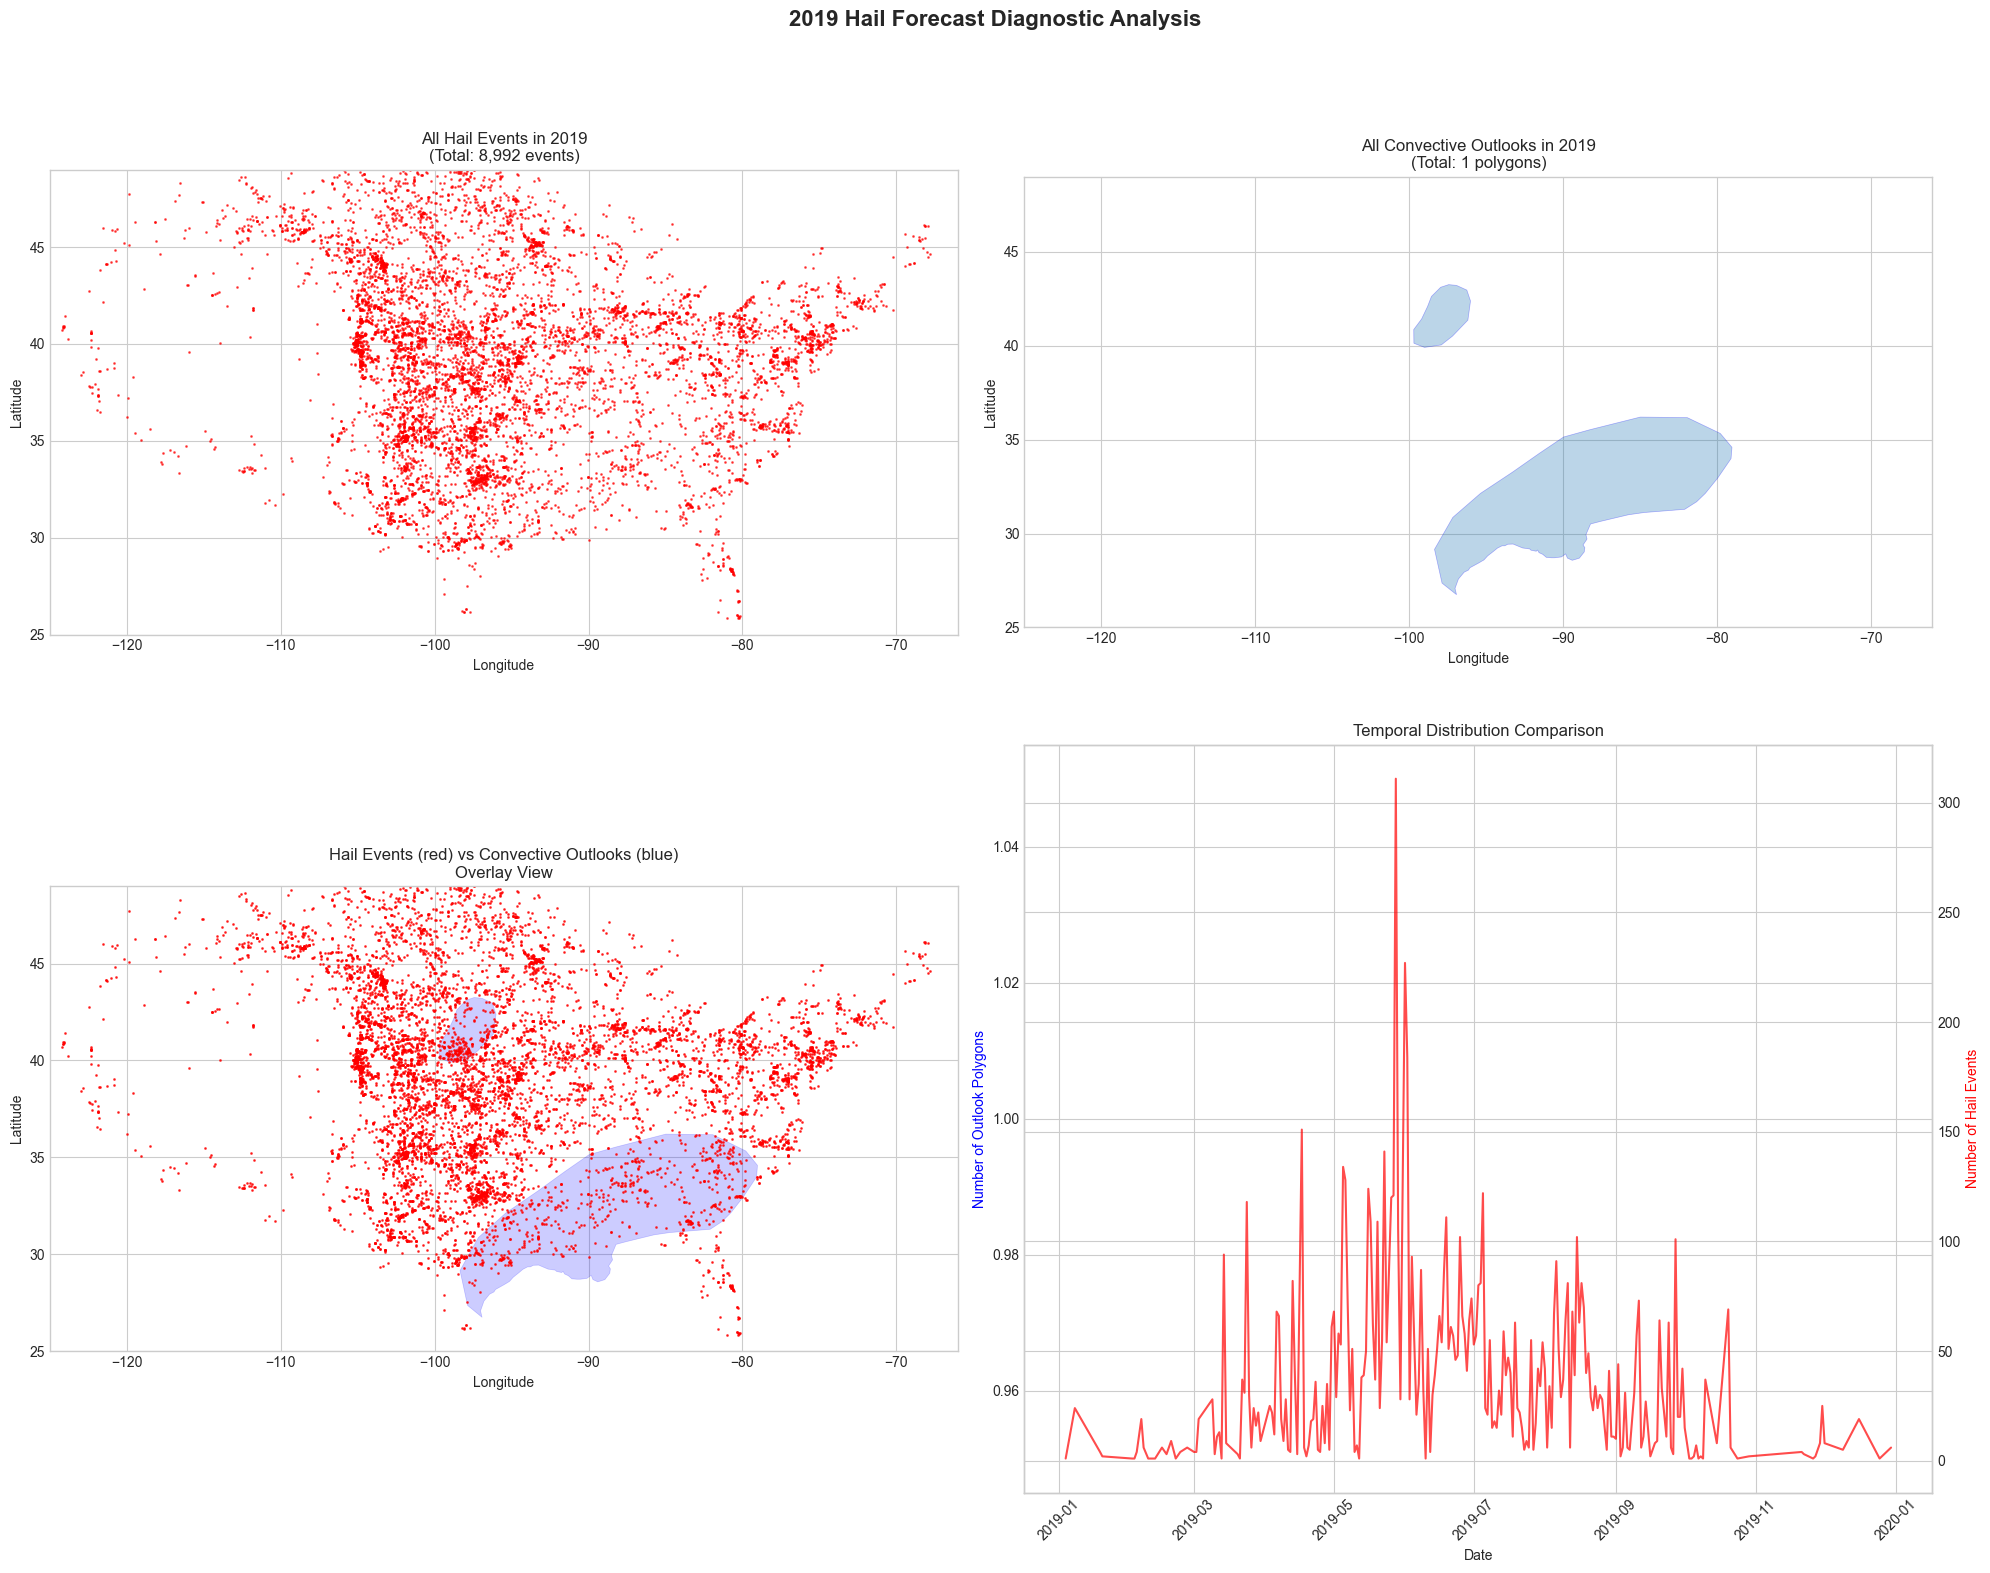


DIAGNOSTIC INFORMATION FOR 2019

HAIL EVENTS:
  Total events: 8,992
  Date range: 2019-01-04 17:29:00 to 2019-12-30 17:16:00
  Lat range: 25.85 to 48.99
  Lon range: -124.21 to -67.80

CONVECTIVE OUTLOOKS:
  Total polygons: 1
  Available columns: ['DN', 'VALID', 'EXPIRE', 'geometry', 'ISSUE', 'LABEL', 'LABEL2', 'stroke', 'fill']
  CRS: EPSG:4326
  VALID range: 2019-05-11 12:00:00 to 2019-05-11 12:00:00
  EXPIRE range: 2019-05-12 12:00:00 to 2019-05-12 12:00:00
  ISSUE range: 2019-05-11 05:49:00 to 2019-05-11 05:49:00
  DN values: ['5']
  DN data type: object
  Geometry bounds: [-99.70, 26.75, -79.02, 43.25]

VERIFICATION STATS:
  year: 2019
  total_events: 8992
  time_covered_events: 7
  spatial_hits: 6
  time_covered_not_hit: 1
  no_window_events: 8985
  total_missed: 8986
  time_coverage_rate: 0.0008
  hit_rate: 0.0007
  miss_rate: 0.9993


In [286]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from pathlib import Path
import contextily as ctx
import warnings
warnings.filterwarnings('ignore')

def plot_2019_hail_diagnostic(results_2019, filtered_hail_reports_gdf):
    """
    Create diagnostic plots for 2019 hail forecasts to identify data issues
    """
    
    # Extract the data
    hail_outlook = results_2019['hail_outlook']
    filtered_reports_2019 = results_2019['filtered_reports']
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('2019 Hail Forecast Diagnostic Analysis', fontsize=16, fontweight='bold')
    
    # Get US states for basemap
    try:
        # Try to get US states from natural earth (if available)
        us_states = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-states.geojson')
        us_states = us_states.to_crs('EPSG:4326')
    except:
        # Fallback: create a simple bounding box for CONUS
        us_bounds = gpd.GeoDataFrame(
            geometry=[gpd.points_from_xy([-125, -66], [25, 49])[0].envelope],
            crs='EPSG:4326'
        )
        us_states = us_bounds
    
    # Plot 1: All hail events in 2019
    ax1 = axes[0, 0]
    if len(us_states) > 1:
        us_states.boundary.plot(ax=ax1, color='black', alpha=0.5, linewidth=0.5)
    ax1.set_xlim(-125, -66)
    ax1.set_ylim(25, 49)
    
    if len(filtered_reports_2019) > 0:
        filtered_reports_2019.plot(ax=ax1, color='red', alpha=0.6, markersize=1)
        ax1.set_title(f'All Hail Events in 2019\n(Total: {len(filtered_reports_2019):,} events)')
    else:
        ax1.set_title('All Hail Events in 2019\n(No events found)')
    
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    
    # Plot 2: All convective outlooks in 2019
    ax2 = axes[0, 1]
    if len(us_states) > 1:
        us_states.boundary.plot(ax=ax2, color='black', alpha=0.5, linewidth=0.5)
    ax2.set_xlim(-125, -66)
    ax2.set_ylim(25, 49)
    
    if len(hail_outlook) > 0:
        hail_outlook.plot(ax=ax2, alpha=0.3, edgecolor='blue', linewidth=0.5)
        ax2.set_title(f'All Convective Outlooks in 2019\n(Total: {len(hail_outlook):,} polygons)')
    else:
        ax2.set_title('All Convective Outlooks in 2019\n(No outlooks found)')
    
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')
    
    # Plot 3: Overlay of both
    ax3 = axes[1, 0]
    if len(us_states) > 1:
        us_states.boundary.plot(ax=ax3, color='black', alpha=0.5, linewidth=0.5)
    ax3.set_xlim(-125, -66)
    ax3.set_ylim(25, 49)
    
    if len(hail_outlook) > 0:
        hail_outlook.plot(ax=ax3, alpha=0.2, color='blue', edgecolor='blue', linewidth=0.5)
    if len(filtered_reports_2019) > 0:
        filtered_reports_2019.plot(ax=ax3, color='red', alpha=0.7, markersize=1)
    
    ax3.set_title('Hail Events (red) vs Convective Outlooks (blue)\nOverlay View')
    ax3.set_xlabel('Longitude')
    ax3.set_ylabel('Latitude')
    
    # Plot 4: Temporal analysis
    ax4 = axes[1, 1]
    
    # Create temporal comparison
    if len(hail_outlook) > 0 and len(filtered_reports_2019) > 0:
        # Plot outlook temporal distribution
        if 'VALID' in hail_outlook.columns:
            outlook_dates = pd.to_datetime(hail_outlook['VALID']).dt.date
            outlook_counts = outlook_dates.value_counts().sort_index()
            
            # Plot hail events temporal distribution
            event_dates = filtered_reports_2019['BEGIN'].dt.date
            event_counts = event_dates.value_counts().sort_index()
            
            # Create time series plot
            ax4.plot(outlook_counts.index, outlook_counts.values, 'b-', alpha=0.7, label='Outlook Days')
            ax4_twin = ax4.twinx()
            ax4_twin.plot(event_counts.index, event_counts.values, 'r-', alpha=0.7, label='Hail Events')
            
            ax4.set_xlabel('Date')
            ax4.set_ylabel('Number of Outlook Polygons', color='blue')
            ax4_twin.set_ylabel('Number of Hail Events', color='red')
            ax4.set_title('Temporal Distribution Comparison')
            ax4.tick_params(axis='x', rotation=45)
        else:
            ax4.text(0.5, 0.5, 'No valid temporal data\nfor comparison', 
                    ha='center', va='center', transform=ax4.transAxes)
            ax4.set_title('Temporal Analysis\n(Data Issues)')
    else:
        ax4.text(0.5, 0.5, 'Insufficient data\nfor temporal analysis', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Temporal Analysis\n(No Data)')
    
    plt.tight_layout()
    plt.show()
    
    # Print diagnostic information
    print("\n" + "="*60)
    print("DIAGNOSTIC INFORMATION FOR 2019")
    print("="*60)
    
    print(f"\nHAIL EVENTS:")
    print(f"  Total events: {len(filtered_reports_2019):,}")
    if len(filtered_reports_2019) > 0:
        print(f"  Date range: {filtered_reports_2019['BEGIN'].min()} to {filtered_reports_2019['BEGIN'].max()}")
        print(f"  Lat range: {filtered_reports_2019['LAT'].min():.2f} to {filtered_reports_2019['LAT'].max():.2f}")
        print(f"  Lon range: {filtered_reports_2019['LON'].min():.2f} to {filtered_reports_2019['LON'].max():.2f}")
    
    print(f"\nCONVECTIVE OUTLOOKS:")
    print(f"  Total polygons: {len(hail_outlook):,}")
    if len(hail_outlook) > 0:
        print(f"  Available columns: {list(hail_outlook.columns)}")
        print(f"  CRS: {hail_outlook.crs}")
        
        # Check temporal columns
        for col in ['VALID', 'EXPIRE', 'ISSUE']:
            if col in hail_outlook.columns:
                try:
                    if hail_outlook[col].dtype == 'object':
                        print(f"  {col} sample values: {hail_outlook[col].head(3).tolist()}")
                    else:
                        print(f"  {col} range: {hail_outlook[col].min()} to {hail_outlook[col].max()}")
                except Exception as e:
                    print(f"  {col} - Error accessing: {e}")
        
        # Check DN values
        if 'DN' in hail_outlook.columns:
            print(f"  DN values: {sorted(hail_outlook['DN'].unique())}")
            print(f"  DN data type: {hail_outlook['DN'].dtype}")
        
        # Check geometry bounds
        bounds = hail_outlook.total_bounds
        print(f"  Geometry bounds: [{bounds[0]:.2f}, {bounds[1]:.2f}, {bounds[2]:.2f}, {bounds[3]:.2f}]")
    
    print(f"\nVERIFICATION STATS:")
    stats = results_2019['verification_stats']
    for key, value in stats.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")

# Run the diagnostic
plot_2019_hail_diagnostic(results_2019, filtered_hail_reports_gdf)

# Plotting it out for Years

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.dates import YearLocator, DateFormatter
import warnings
warnings.filterwarnings('ignore')

In [232]:
def plot_verification_time_series(results_dict, save_plots=False, output_dir='./plots/'):
    """
    Create comprehensive time series plots for hail forecast verification across multiple years.
    
    Parameters:
    -----------
    results_dict : dict
        Dictionary where keys are years and values are results from analyze_hail_forecasts()
    save_plots : bool
        Whether to save plots to files
    output_dir : str
        Directory to save plots if save_plots=True
    """
    
    # Extract verification statistics for all years
    years = sorted(results_dict.keys())
    stats_data = []
    
    for year in years:
        stats = results_dict[year]['verification_stats']
        stats_data.append(stats)
    
    df_stats = pd.DataFrame(stats_data)
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Overall Performance Metrics Time Series
    ax1 = plt.subplot(3, 3, 1)
    plt.plot(df_stats['year'], df_stats['hit_rate'] * 100, 'o-', linewidth=2, markersize=8, label='Hit Rate', color='green')
    plt.plot(df_stats['year'], df_stats['time_coverage_rate'] * 100, 's-', linewidth=2, markersize=8, label='Time Coverage Rate', color='blue')
    plt.plot(df_stats['year'], df_stats['miss_rate'] * 100, '^-', linewidth=2, markersize=8, label='Miss Rate', color='red')
    plt.title('Forecast Performance Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Total Events Time Series
    ax2 = plt.subplot(3, 3, 2)
    plt.plot(df_stats['year'], df_stats['total_events'], 'o-', linewidth=2, markersize=8, color='navy')
    plt.title('Total Hail Events by Year', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df_stats['year'], df_stats['total_events'], 1)
    p = np.poly1d(z)
    plt.plot(df_stats['year'], p(df_stats['year']), "--", alpha=0.7, color='red', label=f'Trend')
    plt.legend()
    
    # 3. Hit vs Miss Events
    ax3 = plt.subplot(3, 3, 3)
    plt.plot(df_stats['year'], df_stats['spatial_hits'], 'o-', linewidth=2, markersize=8, label='Spatial Hits', color='green')
    plt.plot(df_stats['year'], df_stats['total_missed'], 's-', linewidth=2, markersize=8, label='Total Missed', color='red')
    plt.title('Hits vs Misses Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Breakdown of Missed Events
    ax4 = plt.subplot(3, 3, 4)
    plt.plot(df_stats['year'], df_stats['time_covered_not_hit'], 'o-', linewidth=2, markersize=8, 
             label='Time Covered but Missed', color='orange')
    plt.plot(df_stats['year'], df_stats['no_window_events'], 's-', linewidth=2, markersize=8, 
             label='No Window Coverage', color='red')
    plt.title('Types of Missed Events', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Forecast Efficiency (Hits per Total Forecasts)
    ax5 = plt.subplot(3, 3, 5)
    # Calculate total number of forecast polygons per year
    forecast_counts = []
    for year in years:
        forecast_counts.append(len(results_dict[year]['hail_outlook']))
    
    df_stats['forecast_count'] = forecast_counts
    df_stats['efficiency'] = df_stats['spatial_hits'] / df_stats['forecast_count']
    
    plt.plot(df_stats['year'], df_stats['efficiency'], 'o-', linewidth=2, markersize=8, color='purple')
    plt.title('Forecast Efficiency\n(Hits per Forecast Polygon)', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Hits per Forecast')
    plt.grid(True, alpha=0.3)
    
    # 6. Stacked Bar Chart of Event Categories
    ax6 = plt.subplot(3, 3, 6)
    width = 0.6
    bottom_missed = df_stats['no_window_events']
    
    plt.bar(df_stats['year'], df_stats['spatial_hits'], width, label='Spatial Hits', color='green', alpha=0.8)
    plt.bar(df_stats['year'], df_stats['time_covered_not_hit'], width, 
            bottom=df_stats['spatial_hits'], label='Time Covered but Missed', color='orange', alpha=0.8)
    plt.bar(df_stats['year'], df_stats['no_window_events'], width,
            bottom=df_stats['spatial_hits'] + df_stats['time_covered_not_hit'], 
            label='No Window Coverage', color='red', alpha=0.8)
    
    plt.title('Event Categories by Year', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.legend()
    
    # 7. Performance Metrics Correlation Plot
    ax7 = plt.subplot(3, 3, 7)
    scatter = plt.scatter(df_stats['total_events'], df_stats['hit_rate'] * 100, 
                         c=df_stats['year'], s=100, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Year')
    plt.xlabel('Total Events')
    plt.ylabel('Hit Rate (%)')
    plt.title('Hit Rate vs Total Events\n(Colored by Year)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 8. Year-over-Year Change
    ax8 = plt.subplot(3, 3, 8)
    if len(df_stats) > 1:
        hit_rate_change = df_stats['hit_rate'].pct_change() * 100
        plt.bar(df_stats['year'][1:], hit_rate_change[1:], alpha=0.7, 
                color=['green' if x > 0 else 'red' for x in hit_rate_change[1:]])
        plt.title('Year-over-Year Hit Rate Change', fontsize=14, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Change (%)')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.grid(True, alpha=0.3)
    
    # 9. Summary Statistics Table
    ax9 = plt.subplot(3, 3, 9)
    ax9.axis('tight')
    ax9.axis('off')
    
    # Create summary table
    summary_data = []
    for _, row in df_stats.iterrows():
        summary_data.append([
            int(row['year']),
            f"{row['total_events']:,}",
            f"{row['hit_rate']:.1%}",
            f"{row['time_coverage_rate']:.1%}",
            f"{row['miss_rate']:.1%}"
        ])
    
    table = ax9.table(cellText=summary_data,
                     colLabels=['Year', 'Total Events', 'Hit Rate', 'Time Coverage', 'Miss Rate'],
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    ax9.set_title('Summary Statistics', fontsize=14, fontweight='bold', y=0.8)
    
    plt.tight_layout()
    
    if save_plots:
        import os
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f'{output_dir}/hail_verification_time_series.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return df_stats

In [233]:
def plot_calibration_time_series(results_dict, save_plots=False, output_dir='./plots/'):
    """
    Plot calibration data across years.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    years = sorted(results_dict.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
    
    # 1. Reliability Diagram
    ax1 = axes[0, 0]
    for i, year in enumerate(years):
        calib_data = results_dict[year]['calibration_data']
        ax1.plot(calib_data['p'], calib_data['o'], 'o-', label=str(year), 
                color=colors[i], linewidth=2, markersize=6)
    
    # Perfect reliability line
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect Reliability')
    ax1.set_xlabel('Forecast Probability')
    ax1.set_ylabel('Observed Frequency')
    ax1.set_title('Reliability Diagram by Year', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Sample Sizes by DN Level
    ax2 = axes[0, 1]
    dn_levels = [5, 10, 15, 30, 45]  # Common DN levels
    
    for i, year in enumerate(years):
        calib_data = results_dict[year]['calibration_data']
        # Align with common DN levels
        sample_sizes = []
        for dn in dn_levels:
            match = calib_data[calib_data['DN'] == dn]
            if len(match) > 0:
                sample_sizes.append(match['n'].iloc[0])
            else:
                sample_sizes.append(0)
        
        ax2.plot(dn_levels, sample_sizes, 'o-', label=str(year), 
                color=colors[i], linewidth=2, markersize=6)
    
    ax2.set_xlabel('DN Level')
    ax2.set_ylabel('Number of Forecasts')
    ax2.set_title('Sample Sizes by DN Level', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_yscale('log')
    
    # 3. Bias by DN Level
    ax3 = axes[1, 0]
    for i, year in enumerate(years):
        calib_data = results_dict[year]['calibration_data']
        bias = calib_data['o'] - calib_data['p']
        ax3.plot(calib_data['p'], bias, 'o-', label=str(year), 
                color=colors[i], linewidth=2, markersize=6)
    
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax3.set_xlabel('Forecast Probability')
    ax3.set_ylabel('Bias (Observed - Forecast)')
    ax3.set_title('Forecast Bias by Probability Level', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Total Forecasts by Year
    ax4 = axes[1, 1]
    total_forecasts = []
    for year in years:
        calib_data = results_dict[year]['calibration_data']
        total_forecasts.append(calib_data['n'].sum())
    
    bars = ax4.bar(years, total_forecasts, alpha=0.7, color='skyblue')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Total Number of Forecasts')
    ax4.set_title('Total Forecasts by Year', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, total_forecasts):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(total_forecasts)*0.01,
                f'{value:,}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    if save_plots:
        import os
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f'{output_dir}/hail_calibration_time_series.png', dpi=300, bbox_inches='tight')
    
    plt.show()



In [282]:
def print_calibration_table(year, calib_data):
    """Helper function to print calibration table"""
    print(f"\nCalibration Data for {year}:")
    print("-" * 40)
    if len(calib_data) > 0:
        print(f"{'DN':>3} {'n':>6} {'p':>8} {'o':>10}")
        print("-" * 28)
        for _, row in calib_data.iterrows():
            print(f"{row['DN']:>3.0f} {row['n']:>6.0f} {row['p']:>8.2f} {row['o']:>10.6f}")
    else:
        print("No calibration data available")


### Example usage:
**Assuming you have results for multiple years**
results = {}
for year in [2019, 2020, 2021, 2022, 2023]:
    results[year] = analyze_hail_forecasts(year, filtered_hail_reports=your_hail_reports)

** Create time series plots **

stats_df = plot_verification_time_series(results, save_plots=True)
plot_calibration_time_series(results, save_plots=True)

### Print summary statistics
print(stats_df[['year', 'total_events', 'hit_rate', 'time_coverage_rate', 'miss_rate']])

In [284]:
import geopandas as gpd
from pathlib import Path
import pandas as pd

base = Path('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2019')
shp_paths = list(base.glob('*/forecast_day1/*1200/*hail.shp'))

gdfs = []
for p in shp_paths:
    g = gpd.read_file(p)
    # if a shapefile has no CRS, you may need to manually set it first:
    # if g.crs is None:
    #     g = g.set_crs("EPSG:4326")  # or the correct PROJCS string
    
    # now reproject anything not already in EPSG:4326
    if g.crs.to_epsg() != 4326:
        g = g.to_crs(epsg=4326)
    gdfs.append(g)

# concatenate into one, all in the same CRS
hail_outlook_2019 = gpd.GeoDataFrame(
    pd.concat(gdfs, ignore_index=True),
    crs="EPSG:4326"
)



Processing 2024...
Found 548 shapefiles for year 2024.
Combined GeoDataFrame has 773 features.
Available columns: ['DN', 'geometry', 'VALID', 'EXPIRE', 'ISSUE', 'LABEL', 'LABEL2', 'stroke', 'fill']
Data types:
DN             int64
geometry    geometry
VALID         object
EXPIRE        object
ISSUE         object
LABEL         object
LABEL2        object
stroke        object
fill          object
dtype: object
Shape: (773, 9)
Sample date values before conversion:
  VALID: ['202409161200', '202409161200', '202409201200']
  EXPIRE: ['202409171200', '202409171200', '202409211200']
  ISSUE: ['202409160556', '202409160556', '202409200526']

=== Verification Results for 2024 ===
Total hail events in 2024:             8,992
Events time-covered by any window:    8,666 (96.37%)
Events spatially *hit* by any window: 7,090 (78.85%)
Events time-covered but *missed*:     1,576 (17.53%)
Events NOT in any window:             326 (3.63%)
TOTAL events missed by forecasts:     1,902 (21.15%)
DN column d

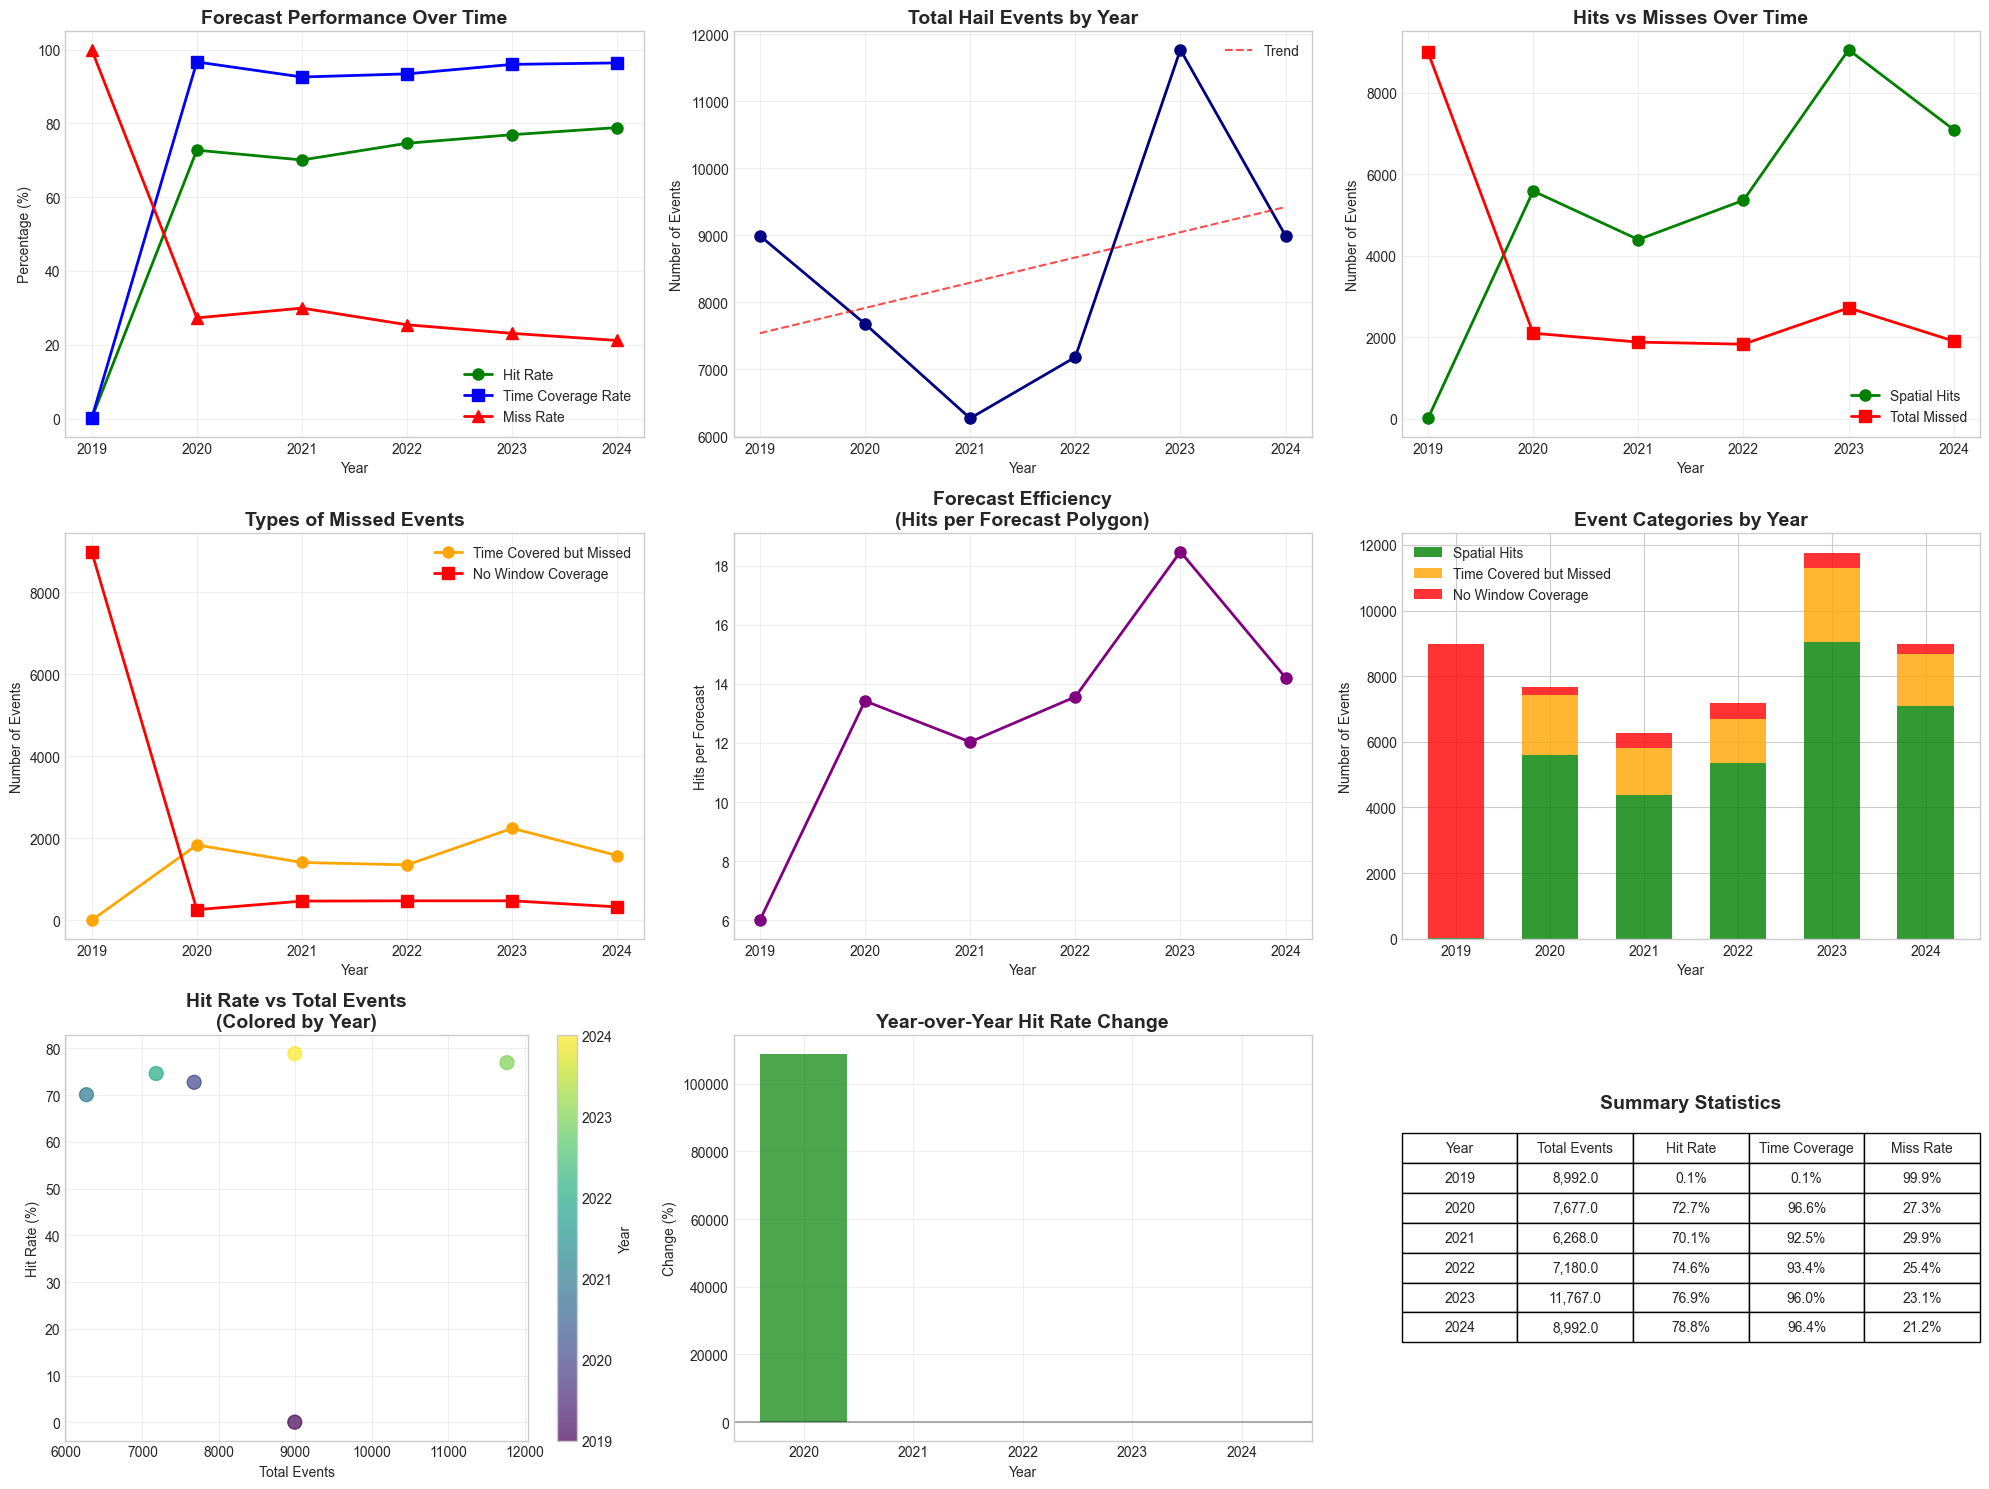

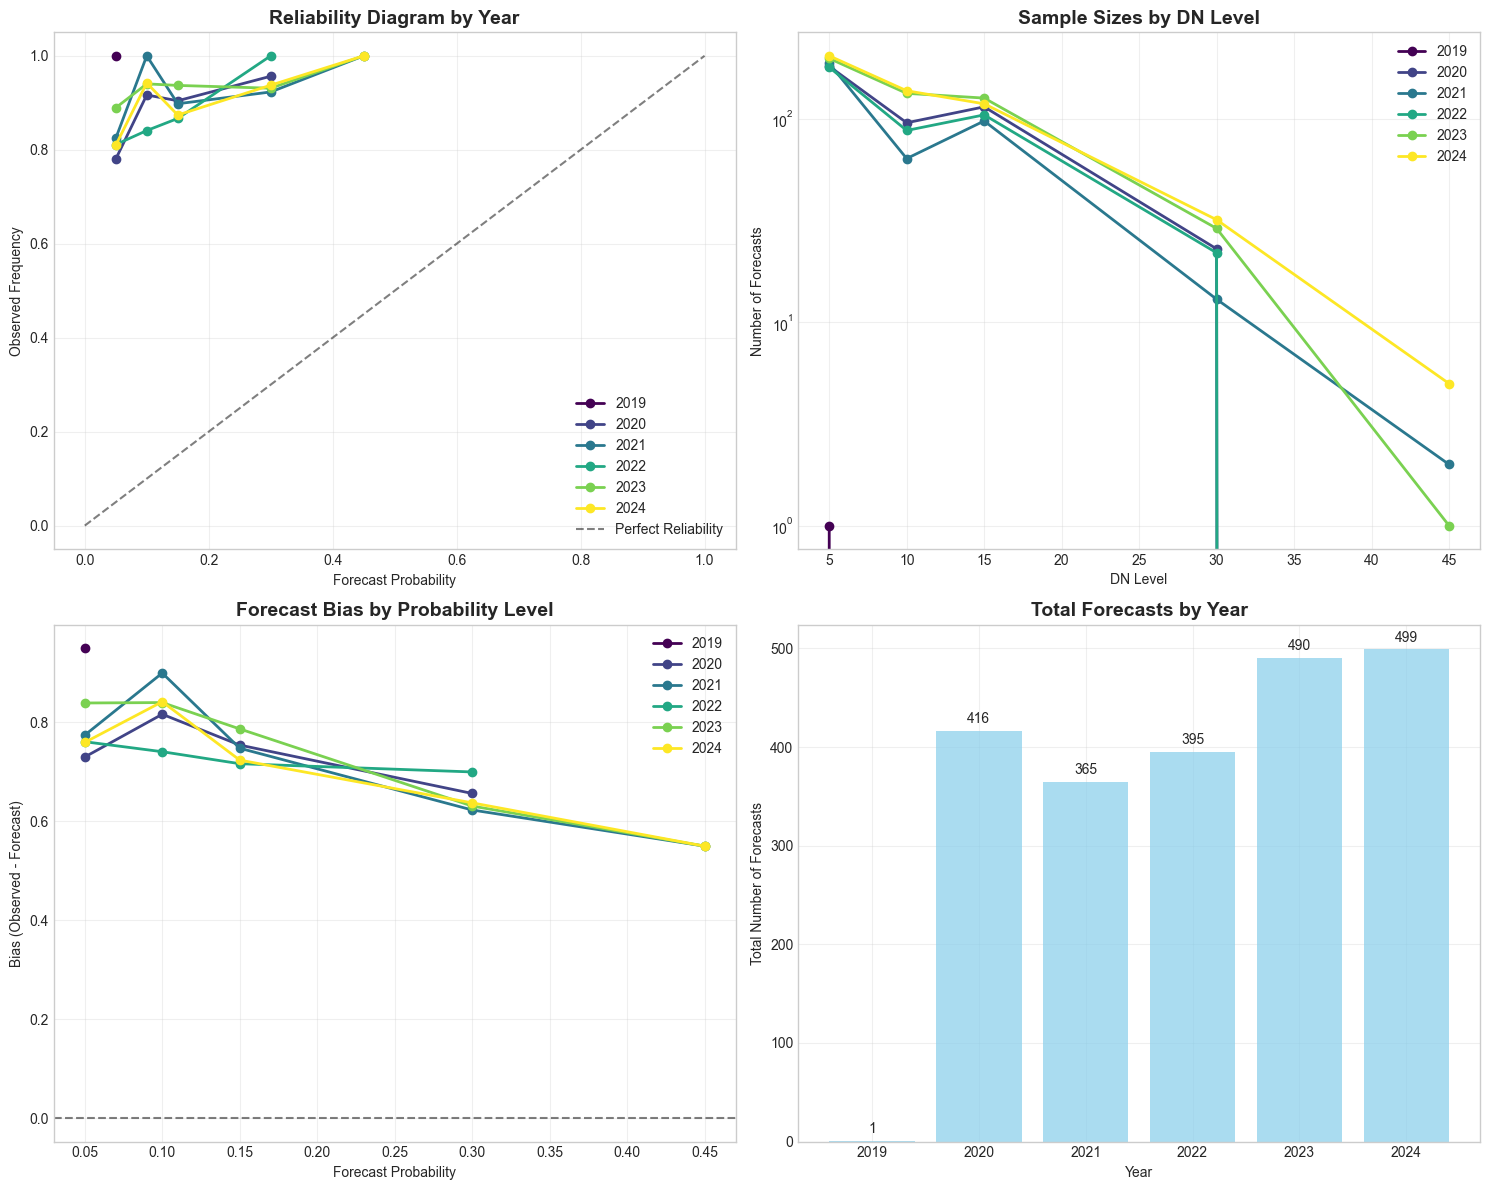


Final Summary:
   year  total_events  hit_rate  time_coverage_rate  miss_rate
0  2019          8992  0.000667            0.000778   0.999333
1  2020          7677  0.727237            0.966263   0.272763
2  2021          6268  0.700702            0.925495   0.299298
3  2022          7180  0.745961            0.933983   0.254039
4  2023         11767  0.769185            0.959718   0.230815
5  2024          8992  0.788479            0.963746   0.211521


In [283]:
results = {}
for year in range(2024, 2018, -1):
    print(f"\n{'='*50}")
    print(f"Processing {year}...")
    print(f"{'='*50}")
    
    results[year] = analyze_hail_forecasts(year, filtered_hail_reports=filtered_hail_reports_gdf)
    
    # Print calibration table immediately
    calib_data = results[year]['calibration_data']
    print_calibration_table(year, calib_data)
    
    # Print quick verification summary
    stats = results[year]['verification_stats']
    print(f"\nQuick Stats: {stats['total_events']:,} events, "
          f"{stats['hit_rate']:.1%} hit rate, "
          f"{stats['miss_rate']:.1%} miss rate")

# Continue with your plotting functions
stats_df = plot_verification_time_series(results, save_plots=True)
plot_calibration_time_series(results, save_plots=True)
print("\nFinal Summary:")
print(stats_df[['year', 'total_events', 'hit_rate', 'time_coverage_rate', 'miss_rate']])